In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

In [2]:
SCRIPT_DIR = os.getcwd()
DATA_DIR = os.path.join(SCRIPT_DIR, '..', 'data')
print DATA_DIR

/Users/aravind/movie-ranking-recommendation-system/notebooks/../data


In [3]:
meta_data = pd.read_csv(DATA_DIR + '/movies_metadata.csv')
nsfw_data = pd.read_csv(DATA_DIR + '/nsfw_score.csv')
print meta_data.shape
print nsfw_data.shape

(45466, 24)
(45047, 2)


/Users/aravind/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
#Changing the column name
nsfw_data.columns = ['id', 'nsfw_score']

#Only using relevant data from the main csv
meta_data_subset = meta_data[['title', 'budget', 'id', 'original_language', 'popularity', 'revenue', 'vote_average', 'vote_count']]

#Converting both fields to the same data type
meta_data_subset['id'] = meta_data_subset['id'].astype(str)
nsfw_data['id'] = nsfw_data['id'].astype(str)

/Users/aravind/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
#merging the two dataframes
df = meta_data_subset.merge(nsfw_data, on='id', how='left')

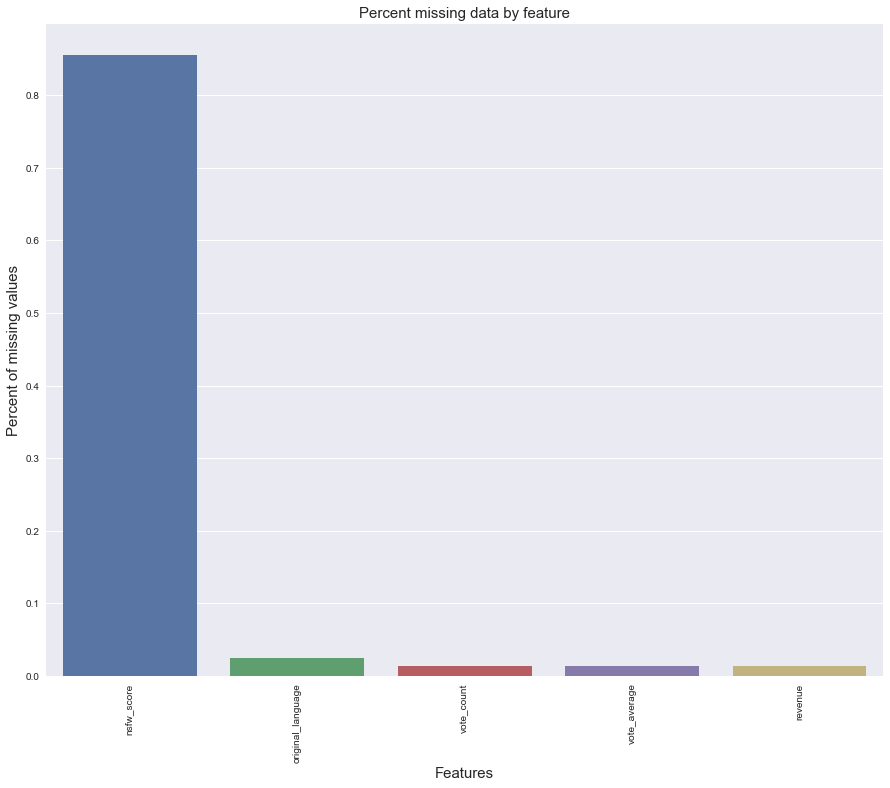

In [53]:
#Looking for missing values
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:5]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})

#plotting the missing data by percentages
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=df_na.index, y=df_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

We were unable to scrape the posters for 0.9% of the data, so we could not calculate the nsfw scores for those movies. This is insignifcant considering the size of our dataset. We can drop the missing values:

In [54]:
df.head()

,title,budget,id,original_language,popularity,revenue,vote_average,vote_count,nsfw_score
0,Toy Story,30000000,862,en,21.9469,373554033.0,7.7,5415.0,0.000582
1,Jumanji,65000000,8844,en,17.0155,262797249.0,6.9,2413.0,0.003873
2,Grumpier Old Men,0,15602,en,11.7129,0.0,6.5,92.0,0.010151
3,Waiting to Exhale,16000000,31357,en,3.85949,81452156.0,6.1,34.0,0.025879
4,Father of the Bride Part II,0,11862,en,8.38752,76578911.0,5.7,173.0,0.004546


In [101]:
#Dropping rows that have missing data
movie_data = df.dropna(axis=0)
print '{} rows dropped'.format(df.shape[0] - movie_data.shape[0])

400 rows dropped


### Popularity Analysis

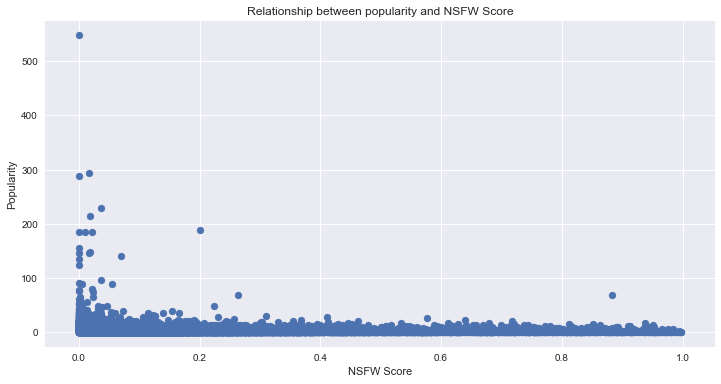

In [114]:
plt.scatter(df['nsfw_score'], df['popularity'])
plt.title('Relationship between popularity and NSFW Score')
plt.xlabel('NSFW Score')
plt.ylabel('Popularity')
plt.show()

In [102]:
movie_data.loc[:,'popularity'] = pd.to_numeric(movie_data['popularity'])

In [108]:
movie_data[(movie_data.popularity > 100) & (movie_data.nsfw_score < 0.4)]

,title,budget,id,original_language,popularity,revenue,vote_average,vote_count,nsfw_score
292,Pulp Fiction,8000000,680,en,140.950236,2.139288e+08,8.3,8670.0,0.069993
12481,The Dark Knight,185000000,155,en,123.167259,1.004558e+09,8.3,12269.0,0.000733
14551,Avatar,237000000,19995,en,185.070892,2.787965e+09,7.2,12114.0,0.011014
23675,Gone Girl,61000000,210577,en,154.801009,3.693304e+08,7.9,6023.0,0.000646
24351,John Wick,20000000,245891,en,183.870374,8.876166e+07,7.0,5499.0,0.000193
24455,Big Hero 6,165000000,177572,en,213.849907,6.521054e+08,7.8,6289.0,0.019436
24873,The Hunger Games: Mockingjay - Part 1,125000000,131631,en,147.098006,7.521002e+08,6.6,5767.0,0.018422
26560,Pirates of the Caribbean: Dead Men Tell No Tales,230000000,166426,en,133.827820,7.941920e+08,6.6,2814.0,0.000010
26564,Deadpool,58000000,293660,en,187.860492,7.831130e+08,7.4,11444.0,0.200710
26566,Guardians of the Galaxy Vol. 2,200000000,283995,en,185.330992,8.634161e+08,7.6,4858.0,0.022276


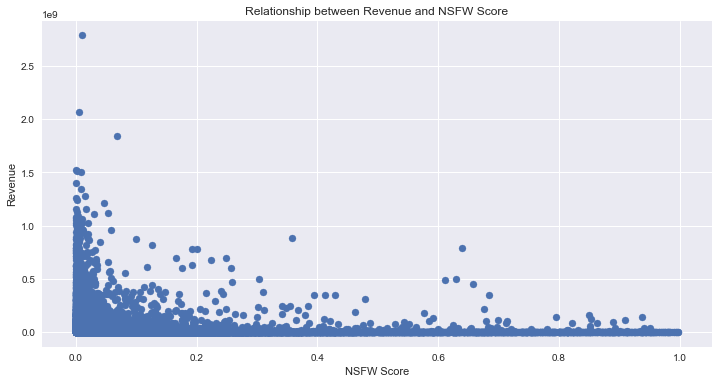

In [123]:
plt.scatter(df['nsfw_score'], df['revenue'])
plt.title('Relationship between Revenue and NSFW Score')
plt.xlabel('NSFW Score')
plt.ylabel('Revenue')
plt.show()

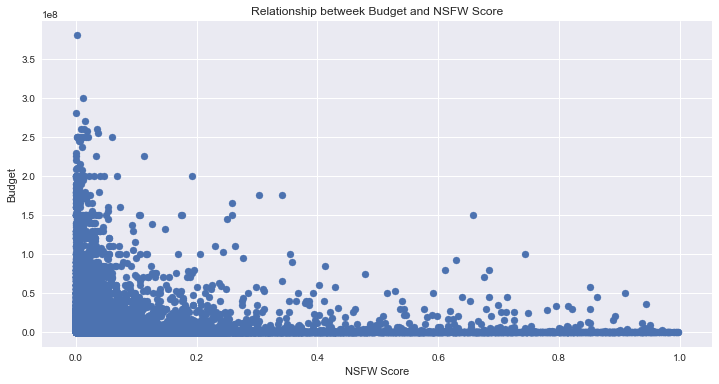

In [124]:
plt.scatter(df['nsfw_score'], df['budget'])
plt.title('Relationship betweek Budget and NSFW Score')
plt.xlabel('NSFW Score')
plt.ylabel('Budget')
plt.show()

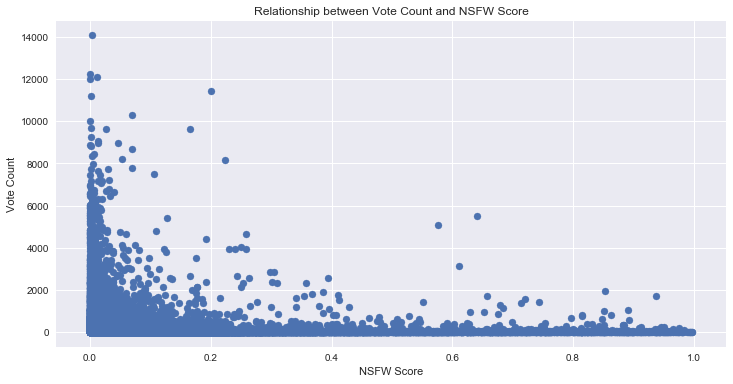

In [126]:
plt.scatter(df['nsfw_score'], df['vote_count'])
plt.title('Relationship between Vote Count and NSFW Score')
plt.xlabel('NSFW Score')
plt.ylabel('Vote Count')
plt.show()

(array([  2.40010000e+04,   5.92400000e+03,   3.08500000e+03,
          1.97700000e+03,   1.39700000e+03,   1.03400000e+03,
          7.61000000e+02,   5.98000000e+02,   5.70000000e+02,
          4.18000000e+02,   3.68000000e+02,   3.30000000e+02,
          3.06000000e+02,   2.51000000e+02,   2.58000000e+02,
          2.42000000e+02,   1.78000000e+02,   1.62000000e+02,
          1.33000000e+02,   1.40000000e+02,   1.37000000e+02,
          1.14000000e+02,   1.41000000e+02,   1.06000000e+02,
          1.14000000e+02,   8.00000000e+01,   8.60000000e+01,
          8.10000000e+01,   8.50000000e+01,   6.80000000e+01,
          7.00000000e+01,   6.50000000e+01,   5.40000000e+01,
          5.40000000e+01,   5.70000000e+01,   5.10000000e+01,
          6.60000000e+01,   4.50000000e+01,   4.60000000e+01,
          3.70000000e+01,   4.40000000e+01,   4.40000000e+01,
          5.10000000e+01,   4.10000000e+01,   3.60000000e+01,
          4.20000000e+01,   3.10000000e+01,   3.10000000e+01,
        

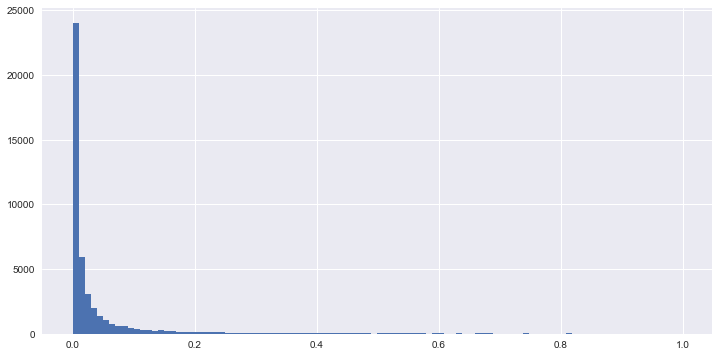

In [131]:
plt.hist(movie_data['nsfw_score'], bins=100)

^how do we account for this?